In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display all columns in the dataframe
pd.set_option('display.max_columns', None)

orders = pd.read_csv("./orders.csv")
products = pd.read_csv("./products.csv")
aisles = pd.read_csv("./aisles.csv")
departments = pd.read_csv("./departments.csv")
order_prior = pd.read_csv("./order_products__prior.csv")
order_train = pd.read_csv("./order_products__train.csv")

In [ ]:
# Initial data exploration 
orders.info()
orders.head()

products.info()
products.head()

aisles.info()
aisles.head()

departments.info()
departments.head()  

order_prior.info()
order_prior.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Dat

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:

# Data Cleaning and Preparation
orders['days_since_prior_order'].fillna(0, inplace=True) 

order_prior = order_prior.astype({
    "order_id": "int32",
    "product_id": "int32",
    "add_to_cart_order": "int16",
    "reordered": "int8"
})

products_full = products.merge(aisles, on="aisle_id") \
                        .merge(departments, on="department_id")

order_products_full = order_prior.merge(products_full, on="product_id", how="left")


In [ ]:
# Data Analysis and Visualization
# 6a. Top 10 most reordered products
reorder_rate = order_products_full.groupby("product_name")["reordered"].mean().sort_values(ascending=False)
reorder_rate = reorder_rate.reset_index().rename(columns={"reordered":"reorder_rate"})


orders_per_dow = orders.groupby("order_dow")["order_id"].count().reset_index()
orders_per_dow.columns = ["day_of_week", "num_orders"]

/var/folders/kt/hy3zrcrs4ws5k8nmt12qs56w0000gn/T/ipykernel_8531/3364487947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="product_name", x="reorder_rate",


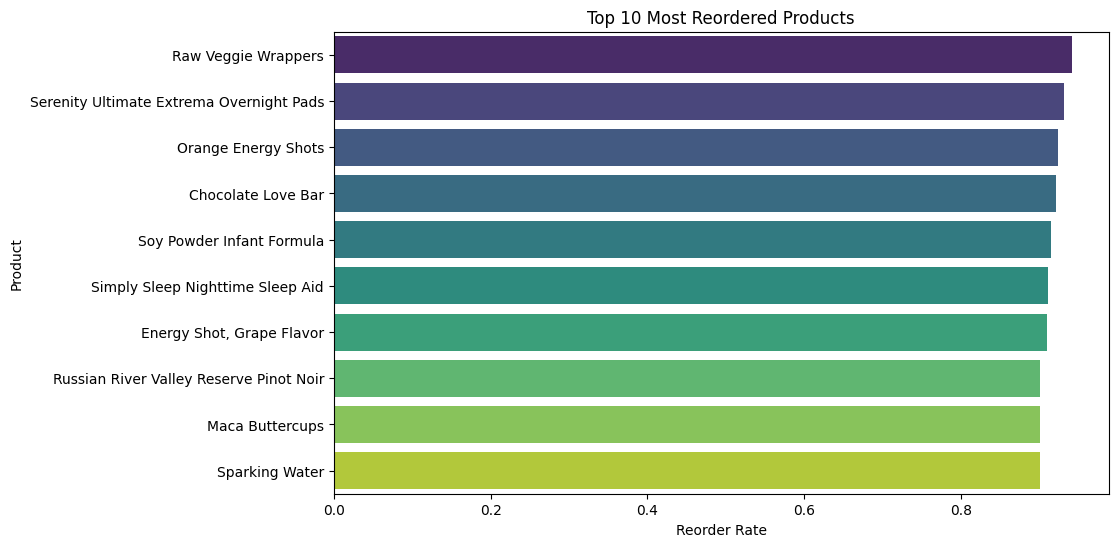

/var/folders/kt/hy3zrcrs4ws5k8nmt12qs56w0000gn/T/ipykernel_8531/3364487947.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="num_orders", data=orders_per_dow, palette="coolwarm")


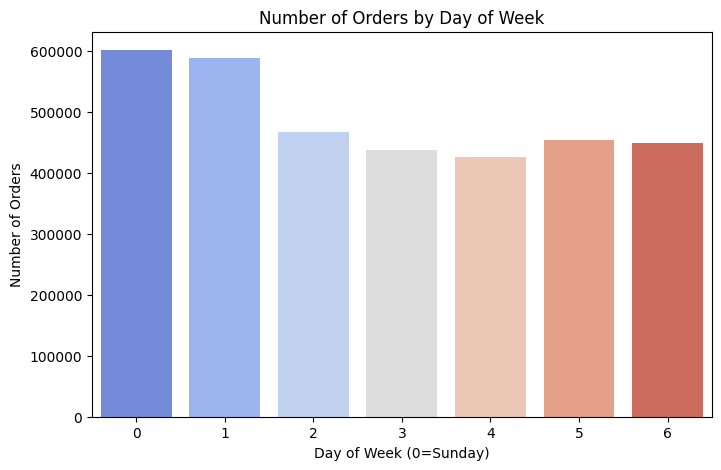

In [ ]:
# Visualizations
plt.figure(figsize=(10,6))
sns.barplot(y="product_name", x="reorder_rate", 
            data=reorder_rate.head(10), palette="viridis")
plt.title("Top 10 Most Reordered Products")
plt.xlabel("Reorder Rate")
plt.ylabel("Product")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="day_of_week", y="num_orders", data=orders_per_dow, palette="coolwarm")
plt.title("Number of Orders by Day of Week")
plt.xlabel("Day of Week (0=Sunday)")
plt.ylabel("Number of Orders")
plt.show()

In [ ]:
# Save cleaned data to new CSV files
products_full.to_csv("clean_products.csv", index=False)
order_products_full.to_csv("clean_order_products.csv", index=False)
orders.to_csv("clean_orders.csv", index=False)